# COVID Data Visualization for 5 regions

In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from custuntions import phase_mask, line_plot, scatter_plot

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
dfs = {}

In [3]:
for file in os.listdir("./DATA"):
    filename = file.split(".")
    dfs[f"{filename[0]}"] = pd.read_csv(f"./DATA/{file}")

In [4]:
dfs_southern = [dfs['Arizona'], dfs['Louisiana'], dfs['Texas'], dfs['Florida']]

In [5]:
dfs_northern = [dfs['Minnesota'], dfs['Massachusetts']]

In [6]:
dfs_western = [dfs['Nevada'], dfs['California'], dfs['Oregon']]

In [7]:
dfs_eastern = [dfs['New York'], dfs['New Jersey']]

In [8]:
dfs['Minnesota']

,LAT,LON,YEAR,MO,DY,RH2M,T2M_RANGE,WS10M_RANGE,WS50M_RANGE,T2M_MIN,T2M_MAX,T2MDEW
0,46.26811,-94.55479,2020,3,1,89.35,7.68,6.75,7.89,-5.01,2.67,-2.21
1,46.26811,-94.55479,2020,3,2,83.03,12.99,4.44,5.39,-12.05,0.94,-6.97
2,46.26811,-94.55479,2020,3,3,89.25,9.61,3.70,3.11,-7.78,1.83,-3.98
3,46.26811,-94.55479,2020,3,4,88.26,12.92,6.77,8.66,-9.66,3.26,-5.02
4,46.26811,-94.55479,2020,3,5,88.50,7.44,8.86,9.44,-7.21,0.23,-3.46
...,...,...,...,...,...,...,...,...,...,...,...,...
376,46.26811,-94.55479,2021,3,12,69.89,11.34,3.92,7.70,-9.68,1.66,-8.96
377,46.26811,-94.55479,2021,3,13,67.99,14.63,3.95,6.07,-2.34,12.29,-1.76
378,46.26811,-94.55479,2021,3,14,64.56,10.32,5.30,3.60,-5.21,5.11,-5.95
379,46.26811,-94.55479,2021,3,15,71.72,7.50,5.95,5.75,-5.20,2.30,-6.30


In [9]:
for city in dfs:
    dfs[city]["Date"] = pd.to_datetime(dfs[city]["YEAR"].astype(str) + "/" + dfs[city]["MO"].astype(str) + "/" + dfs[city]["DY"].astype(str))
    dfs[city].set_index('Date', inplace=True)
    dfs[city].drop(["LAT", "LON", "YEAR", "MO", "DY"], axis=1, inplace=True)

In [10]:
df_southern_mean = pd.concat(dfs_southern).groupby("Date").mean()
df_northern_mean = pd.concat(dfs_northern).groupby("Date").mean()
df_eastern_mean = pd.concat(dfs_eastern).groupby("Date").mean()
df_western_mean = pd.concat(dfs_western).groupby("Date").mean()

In [11]:
columns = {'RH2M':'Relative Humidity at 2 Meters (%)',
           'T2MDEW': 'Dew/Frost Point at 2 Meters (C)',
           'T2M_MAX': 'Maximum Temperature at 2 Meters (C)',
           'T2M_MIN' :'Minimum Temperature at 2 Meters (C)',
           'T2M_RANGE': 'Temperature Range at 2 Meters (C)',
           'WS10M_RANGE': 'Wind Speed Range at 10 Meters (m/s)'
}

## Southern Region

In [12]:
df_southern_mean.rename(columns=columns, inplace=True)

In [13]:
df_southern_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),WS50M_RANGE,Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C)
Date,,,,,,,
2020-03-01,67.1875,13.6650,3.6400,4.4350,8.3500,22.0150,8.4050
2020-03-02,72.8775,10.7650,3.6000,3.8250,12.5425,23.3075,12.4050
2020-03-03,71.7675,10.9675,3.7650,6.1350,13.7875,24.7550,12.9300
2020-03-04,75.1750,12.7000,4.1325,5.8375,11.2275,23.9275,13.1650
2020-03-05,62.7950,13.7625,4.8050,6.5375,11.4775,25.2375,10.0900
...,...,...,...,...,...,...,...
2021-03-12,67.6050,11.0275,2.5000,2.7500,13.3750,24.4025,11.9275
2021-03-13,69.8050,10.1900,3.6475,5.0550,13.1900,23.3850,11.9350
2021-03-14,62.4100,14.6225,4.1800,5.5975,10.0575,24.6825,9.5300


In [14]:
# phase one and phase 2 seperation here
phase1_southern_mean, phase2_southern_mean = phase_mask(df_southern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_southern_mean = phase1_southern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_southern_mean = phase2_southern_mean.drop(["recoveries", "mortalities"], axis=1)

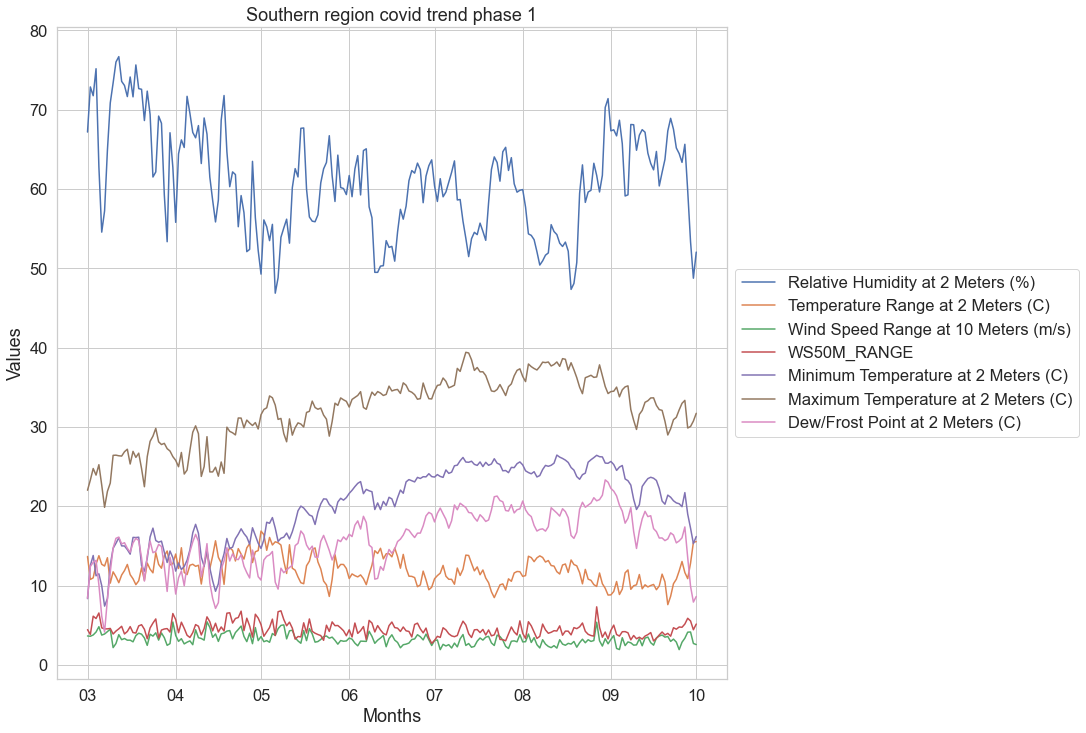

In [15]:
fig, ax = line_plot(phase1_southern_mean, "Southern region covid trend phase 1")

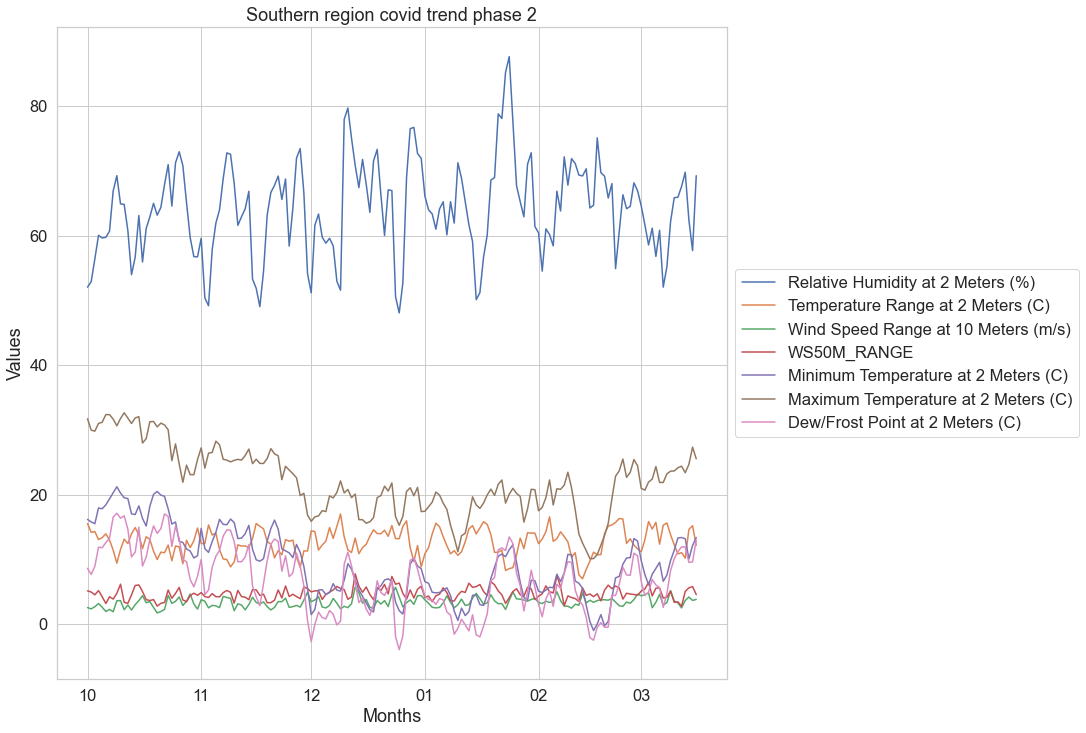

In [16]:
fig, ax = line_plot(phase2_southern_mean, "Southern region covid trend phase 2")

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["T2MDEW"])

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["WS10M_RANGE"])

## Nothern Region

In [18]:
df_northern_mean.rename(columns=columns, inplace=True)

In [19]:
df_northern_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),WS50M_RANGE,Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C)
Date,,,,,,,
2020-03-01,79.160,8.640,4.630,6.115,-7.575,1.065,-6.360
2020-03-02,85.280,14.020,4.385,6.465,-9.030,4.990,-3.670
2020-03-03,89.180,10.695,3.240,4.410,-2.460,8.235,0.930
2020-03-04,83.640,9.980,5.365,6.865,-4.465,5.510,-1.875
2020-03-05,80.705,8.630,5.640,6.830,-4.275,4.355,-2.585
...,...,...,...,...,...,...,...
2021-03-12,71.290,10.735,3.715,6.465,-3.445,7.295,-2.630
2021-03-13,65.125,12.410,4.015,6.025,-3.450,8.960,-4.080
2021-03-14,64.570,10.755,4.800,5.075,-5.745,5.010,-6.335


In [20]:
# phase one and phase 2 seperation here
phase1_northern_mean, phase2_northern_mean = phase_mask(df_northern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_northern_mean = phase1_northern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_northern_mean = phase2_northern_mean.drop(["recoveries", "mortalities"], axis=1)

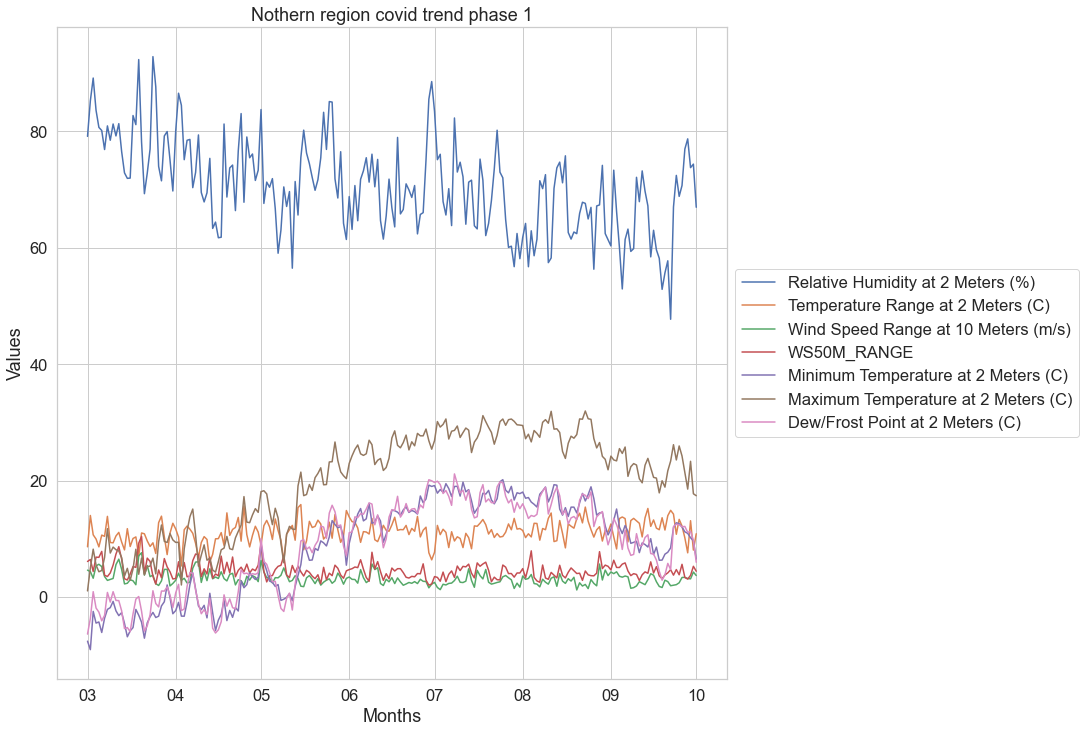

In [21]:
fig, ax = line_plot(phase1_northern_mean, "Nothern region covid trend phase 1")

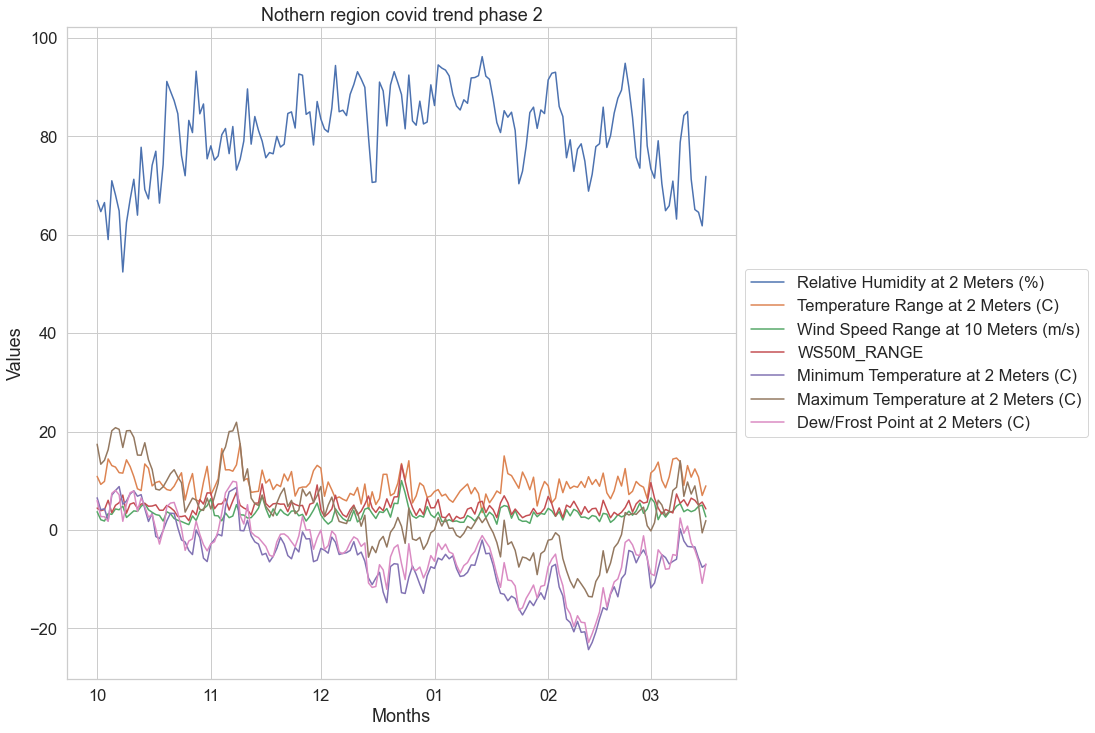

In [22]:
fig, ax = line_plot(phase2_northern_mean, "Nothern region covid trend phase 2")

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2MDEW"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["WS10M_RANGE"])

## Eastern Region

In [23]:
df_eastern_mean.rename(columns=columns, inplace=True)

In [24]:
df_eastern_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),WS50M_RANGE,Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C)
Date,,,,,,,
2020-03-01,72.520,10.575,2.460,3.155,-6.105,4.465,-5.565
2020-03-02,87.215,13.520,3.195,5.890,-1.495,12.025,3.240
2020-03-03,91.870,9.470,4.595,8.420,4.475,13.940,7.635
2020-03-04,74.855,7.345,3.975,4.085,3.450,10.795,2.580
2020-03-05,70.600,11.890,2.650,5.505,-1.800,10.095,-0.680
...,...,...,...,...,...,...,...
2021-03-12,75.160,9.830,3.375,6.490,5.835,15.665,6.760
2021-03-13,64.880,10.595,4.325,7.700,-3.205,7.385,-4.115
2021-03-14,67.035,12.440,4.650,7.750,-3.665,8.775,-3.225


In [25]:
# phase one and phase 2 seperation here
phase1_eastern_mean, phase2_eastern_mean = phase_mask(df_eastern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_eastern_mean = phase1_eastern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_eastern_mean = phase2_eastern_mean.drop(["recoveries", "mortalities"], axis=1)

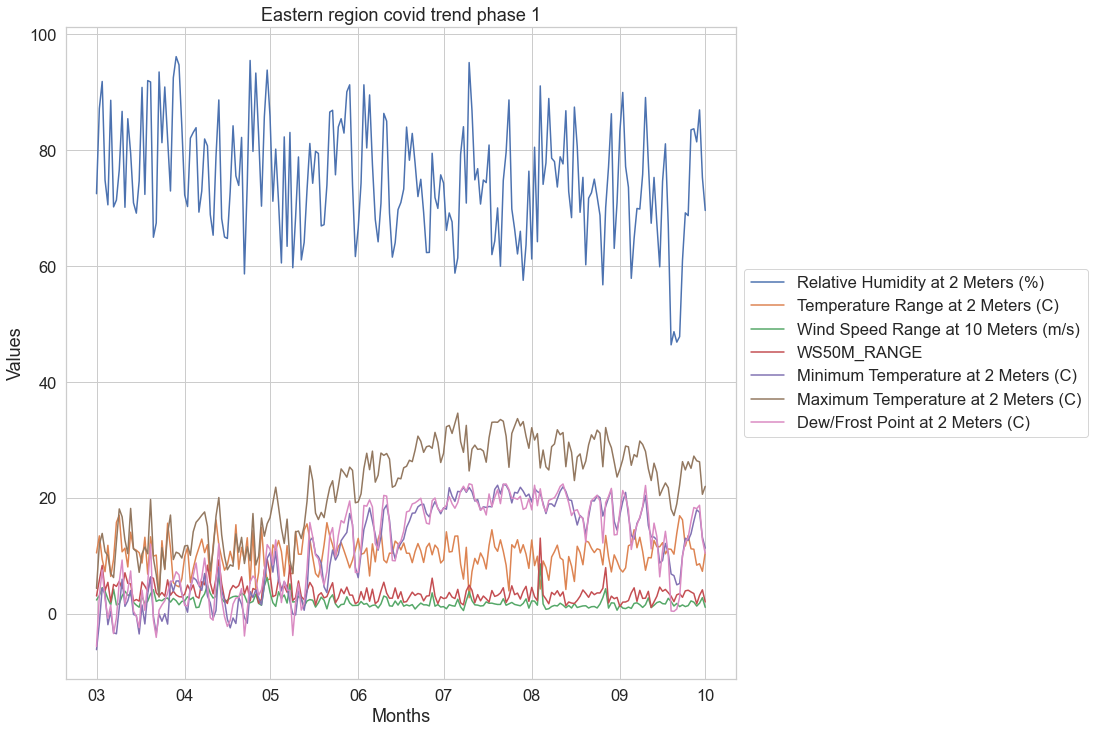

In [26]:
fig, ax = line_plot(phase1_eastern_mean, "Eastern region covid trend phase 1")

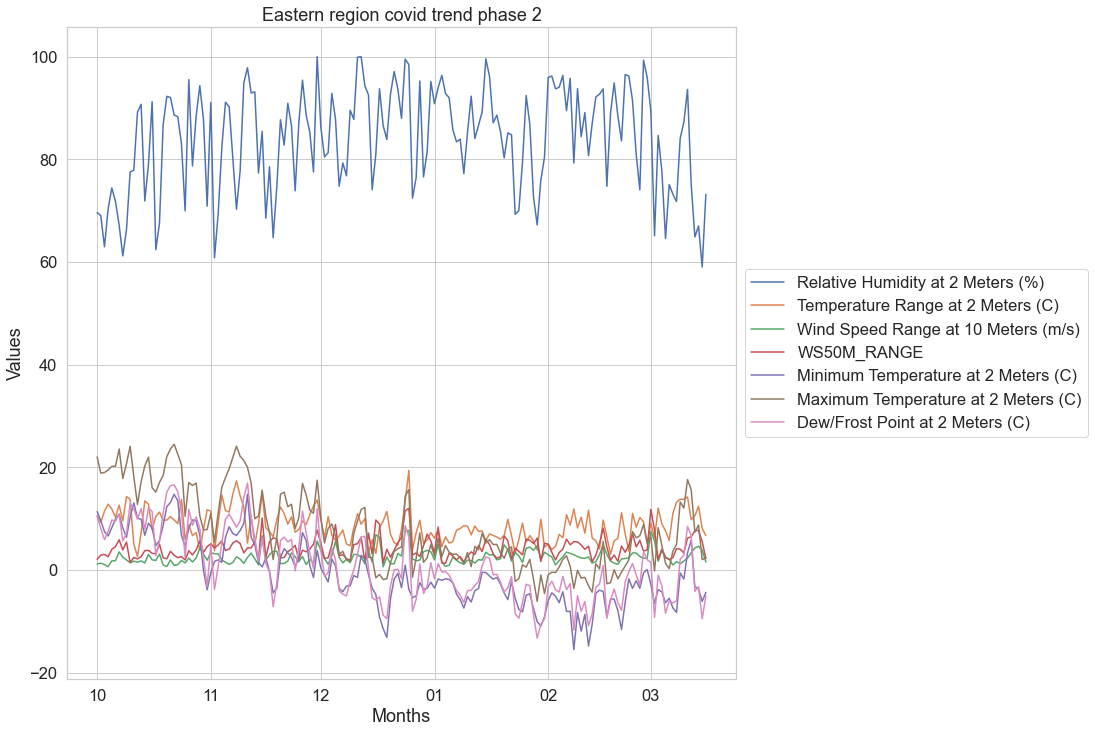

In [27]:
fig, ax = line_plot(phase2_eastern_mean, "Eastern region covid trend phase 2")

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2MDEW"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["WS10M_RANGE"])

## Western Region

In [28]:
df_western_mean.rename(columns=columns, inplace=True)

In [29]:
df_western_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),WS50M_RANGE,Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C)
Date,,,,,,,
2020-03-01,67.400000,7.180000,5.430000,5.493333,-0.363333,6.816667,-2.686667
2020-03-02,56.376667,11.783333,5.003333,4.206667,-1.186667,10.603333,-4.820000
2020-03-03,53.486667,15.456667,4.496667,5.393333,0.930000,16.383333,-1.633333
2020-03-04,53.980000,14.420000,2.883333,4.133333,1.896667,16.316667,-0.576667
2020-03-05,45.876667,15.246667,4.046667,4.816667,4.413333,19.663333,-0.650000
...,...,...,...,...,...,...,...
2021-03-12,55.926667,10.636667,2.716667,3.340000,-2.103333,8.530000,-5.080000
2021-03-13,47.976667,14.716667,3.980000,4.456667,-1.496667,13.216667,-5.506667
2021-03-14,60.936667,13.283333,4.723333,5.716667,-0.180000,13.096667,-2.113333


In [30]:
# phase one and phase 2 seperation here
phase1_western_mean, phase2_western_mean = phase_mask(df_western_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_western_mean = phase1_western_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_western_mean = phase2_western_mean.drop(["recoveries", "mortalities"], axis=1)

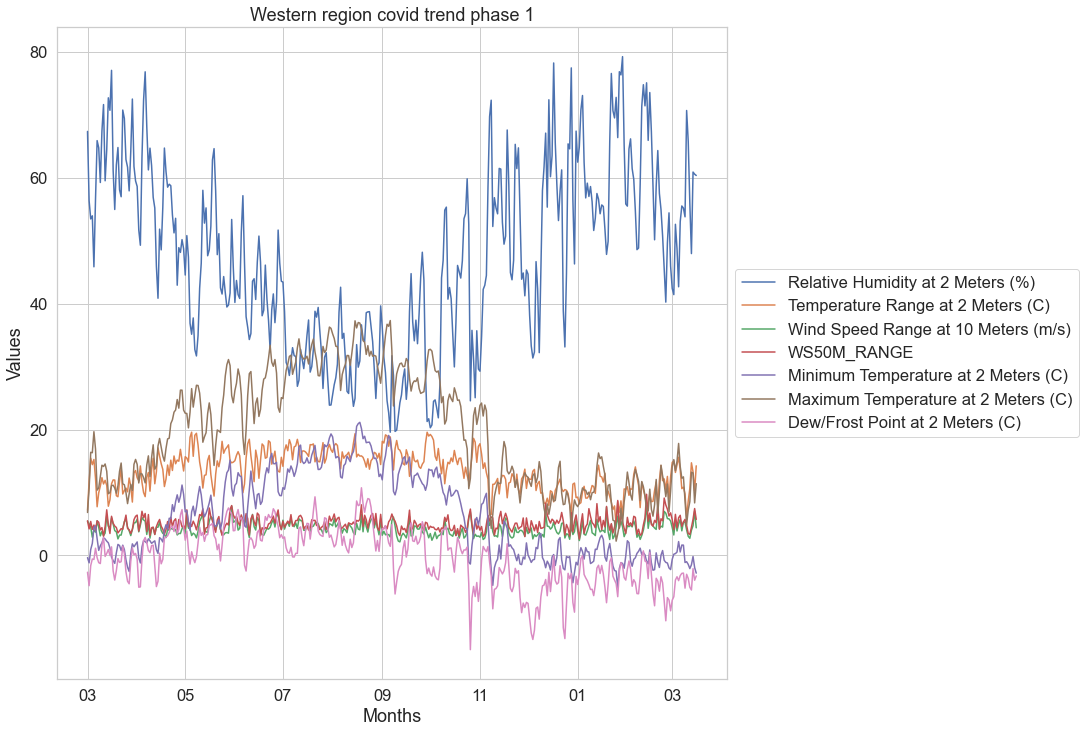

In [31]:
fig, ax = line_plot(df_western_mean, "Western region covid trend phase 1")

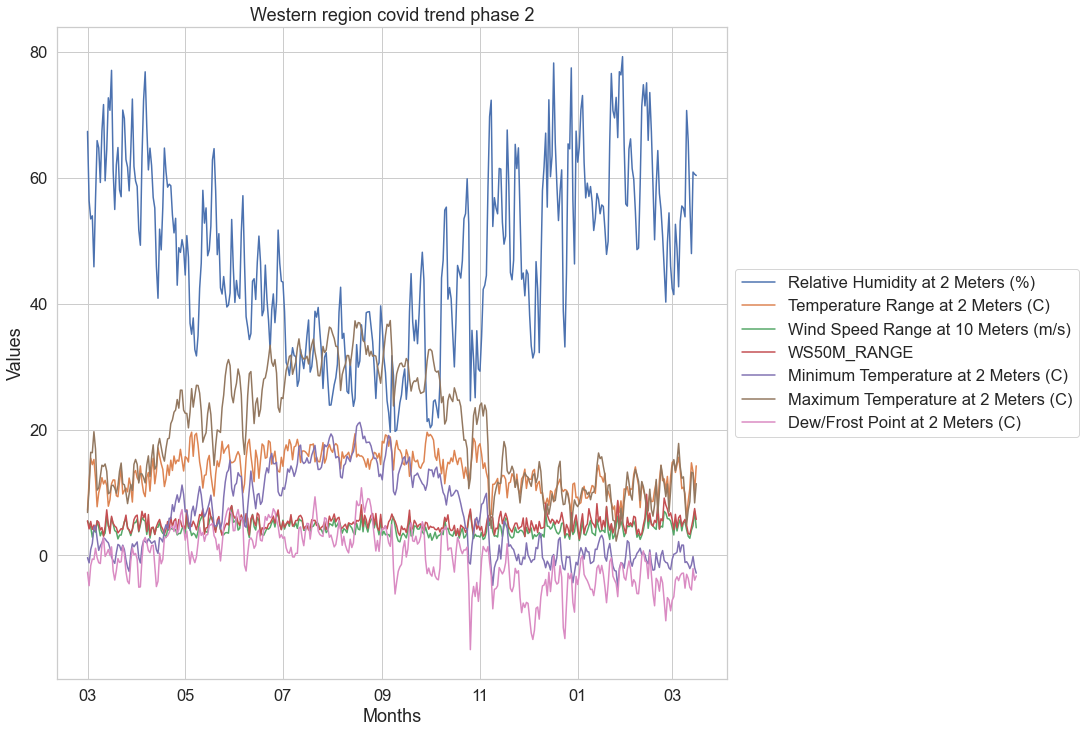

In [32]:
fig, ax = line_plot(df_western_mean, "Western region covid trend phase 2")

In [ ]:
scatter_plot(df_western_mean, "cases", columns["RH2M"]) 

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2MDEW"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["WS10M_RANGE"])

## Converting region dataframes into excel files

In [ ]:
df_southern_mean.to_excel("Southern_weather_cases.xlsx") 
df_northern_mean.to_excel("northern_weather_cases.xlsx") 
df_eastern_mean.to_excel("eastern_weather_cases.xlsx") 
df_western_mean.to_excel("western_weather_cases.xlsx")
df_riyadh.to_excel("Riyadh_weather_cases.xlsx") 